In [1]:
from data.data_collector import DataCollector

In [2]:
dc_sb = DataCollector('spambase')
dc_bw = DataCollector('breastw')


In [3]:
from evaluation.linear_translator import translate_kfold
import torch
import numpy as np

In [4]:
index_list = dc_bw.find_lime_zero_explanations()
non_index_list = [i for i in range(0, 1000) if i not in index_list]


In [5]:
from evaluation.numerical_evaluation import calculate_variance

In [6]:
print(calculate_variance(dc_bw.scaled_explanations, False, True))

{0: tensor([0.8843, 0.1680, 0.4737, 0.0551, 0.1356, 0.3657, 0.1584, 0.1224, 0.2247]), 1: tensor([0.3612, 0.1104, 0.1815, 0.0858, 0.1126, 0.1995, 0.1382, 0.1313, 0.1291]), 2: tensor([0.2503, 0.0159, 0.1737, 0.0049, 0.0281, 0.1721, 0.0648, 0.0287, 0.0475]), 3: tensor([0.5303, 0.0927, 0.1992, 0.0502, 0.0703, 0.2421, 0.1437, 0.0796, 0.1363]), 4: tensor([0.6151, 0.1277, 0.4458, 0.0636, 0.1123, 0.4575, 0.1550, 0.1387, 0.2985])}


In [7]:
# meta_y = dc_bw.collect_meta_data()
# meta_y = meta_y['Y']
# print(np.count_nonzero(meta_y[non_index_list]))
# print(len(meta_y[non_index_list])-np.count_nonzero(meta_y[non_index_list]))

# index_list_sb = dc_sb.find_lime_zero_explanations()
# non_index_list_sb = [i for i in range(0, 921) if i not in index_list_sb]
# meta_y_sb = dc_sb.collect_meta_data()['Y']
# print(meta_y_sb[index_list_sb])
# print(len(index_list_sb))
# dc_btsc = DataCollector('btsc')
# print(np.count_nonzero(meta_y_sb))
# print(len(meta_y_sb))
# print(np.count_nonzero(meta_y_sb[non_index_list_sb]))

# index_list_btsc = dc_btsc.find_lime_zero_explanations()
# non_index_list_btsc = [i for i in range(0, 150) if i not in index_list_btsc]
# meta_y_btsc = dc_btsc.collect_meta_data()['Y']
# print(len(index_list_btsc))
# print(np.count_nonzero(meta_y_btsc))

# print(meta_y_btsc[index_list_btsc])


In [8]:
from evaluation.linear_translator import compare_to_mean_baseline


In [9]:
# print(compare_to_mean_baseline(dc_sb.scaled_explanations[0:921, :-1].numpy()))
# print(compare_to_mean_baseline(dc_bw.scaled_explanations[0:1000, :-1].numpy()))
# print(compare_to_mean_baseline(dc_sb.scaled_explanations[4000:5000, :-1].numpy()))

In [10]:
# targets = torch.ones((921, 57))
# print(translate_kfold(dc_sb.explanations_all[0:921, :-1], targets))

In [11]:
dc_bw.create_non_zero_dataset()

tensor([[-1.0000, -0.5906, -0.9012,  ..., -0.5617, -0.5825,  0.0000],
        [-1.0000, -0.5970, -0.8956,  ..., -0.5582, -0.5804,  0.0000],
        [ 1.0000,  0.3733,  0.7184,  ...,  0.1999,  0.3295,  0.0000],
        ...,
        [-0.8002, -0.6329, -1.0000,  ..., -0.6916, -0.6727,  4.0000],
        [ 1.0000,  0.0845,  0.3305,  ..., -0.1281,  0.4459,  4.0000],
        [-1.0000, -0.0712, -0.3365,  ..., -0.0229, -0.8487,  4.0000]])

In [12]:
from evaluation.linear_translator import translate, translate_pairwise
import numpy as np
# from sklearn.metrics import mean_squared_error

In [40]:
r2_scaled, mse_scaled, mse_baseline, variance = translate_pairwise(dc_bw.scaled_explanations, dc_bw.non_zero_explanations)
masked_indices3, masked_indices_non_zero3 = dc_bw.mask_features(3, 0, True)
r2_masked3, mse_masked3, mse_baseline3, variance3 = translate_pairwise(dc_bw.masked_explanations, dc_bw.non_zero_masked_explanations, masked=True, masked_indices=masked_indices3, non_zero_masked_indices=masked_indices_non_zero3)
masked_indices6, masked_indices_non_zero6 = dc_bw.mask_features(6, 0, True)
r2_masked6, mse_masked6, mse_baseline6, variance6 = translate_pairwise(dc_bw.masked_explanations, dc_bw.non_zero_masked_explanations, masked=True, masked_indices=masked_indices6, non_zero_masked_indices=masked_indices_non_zero6)

0.10716999
0.11381841
0.115831256
0.11225739
0.10952878
0.11524545
0.1106631
0.1189163
0.10991913
0.12833717
0.084092826
0.07859966
0.092147805
0.07574645
0.092323415
0.084608585
0.08353391
0.07224338
0.07725351
0.08188288
0.16753934
0.15069836
0.14260083
0.15189186
0.21590148
0.13096514
0.18073326
0.16274717
0.14501825
0.12965462
0.0042099827
0.0048116567
0.00458921
0.0051871073
0.005131582
0.005700403
0.0041872007
0.004466207
0.003764891
0.0045304485
0.20483287
0.16359514
0.21711665
0.19930801
0.16783524
0.18007112
0.16954862
0.20345446
0.16996476
0.17447318
0.042901214
0.03816852
0.040357385
0.041210756
0.037319254
0.029344741
0.033119142
0.041935697
0.033113204
0.037011605
0.17098285
0.1564334
0.14882492
0.14968608
0.21444029
0.12865607
0.18105108
0.16758786
0.14648822
0.12615773
0.19192058
0.15641142
0.20479852
0.18783736
0.15702744
0.16531248
0.16073251
0.1932205
0.16451883
0.16480109
0.17858976
0.18513338
0.21083814
0.26783407
0.2532116
0.24268328
0.19811149
0.30061188
0.189511


In [15]:
y_pred = dc_bw.scaled_explanations[:20, :-1]
y_true = dc_bw.masked_explanations[:20, :-1]

print (y_pred[0])
print (y_true[0])

tensor([-1.0000, -0.5906, -0.9012, -0.3607, -0.4923, -0.7449, -0.4242, -0.5617,
        -0.5825])
tensor([-1.0000, -0.5906, -0.9012,  0.0000,  0.0000, -0.7449,  0.0000, -0.5617,
        -0.5825])


In [41]:
from visualization.translator_fig import visualize_translation_scores, visualize_multiple_scores

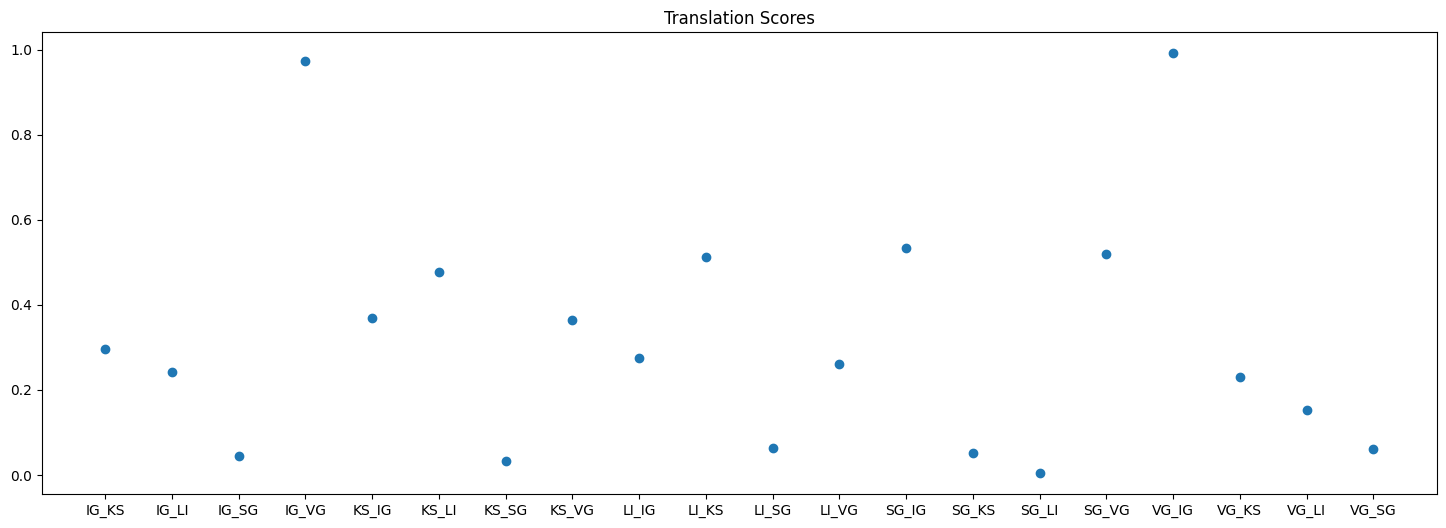

In [15]:
visualize_translation_scores(r2_scaled)

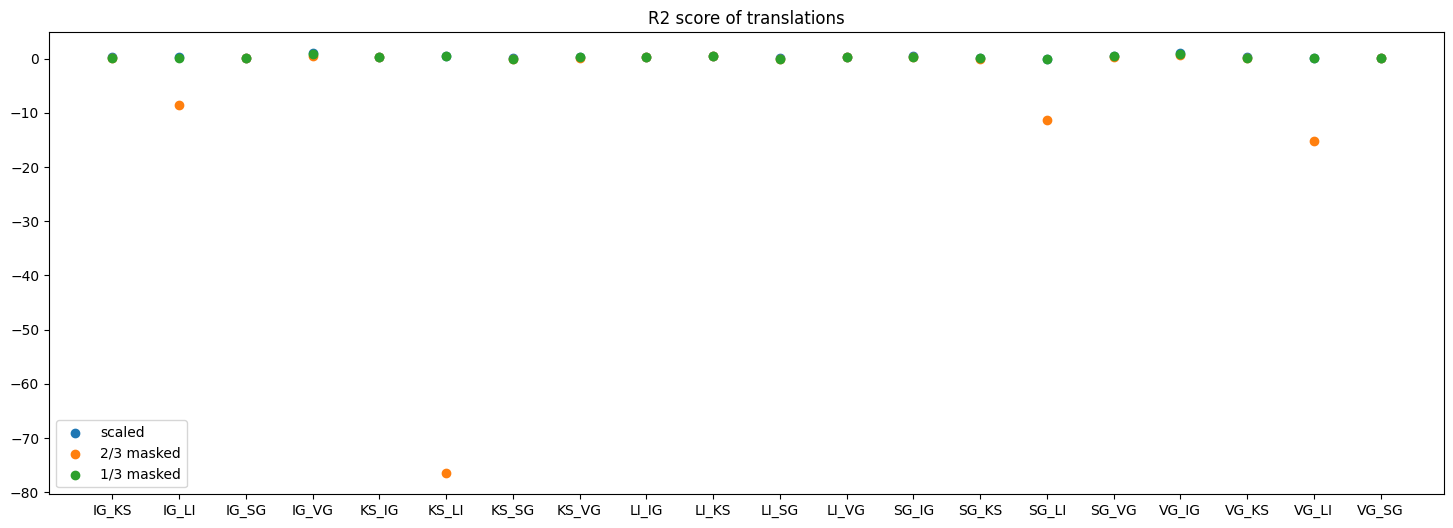

In [16]:
visualize_multiple_scores(r2_scaled, r2_masked3, r2_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'R2 score of translations')

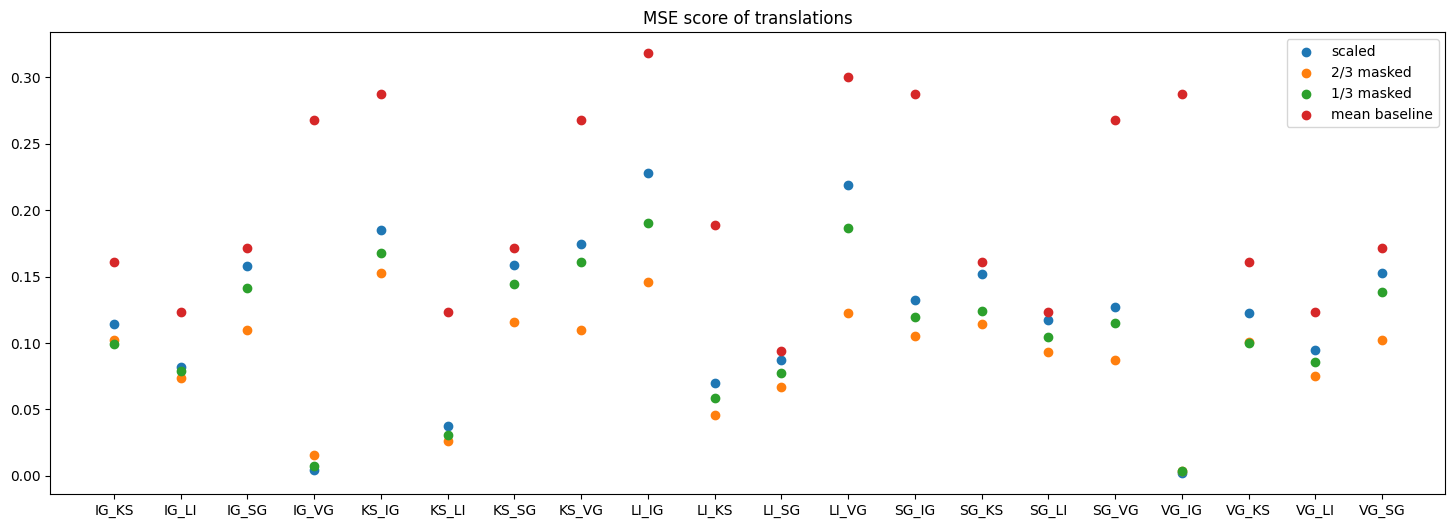

In [42]:
visualize_multiple_scores(mse_scaled, mse_masked3, mse_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'MSE score of translations', mse_baseline)

In [18]:
masked_false3 = mse_masked3
masked_false6 = mse_masked6

In [21]:
masked_true3 = mse_masked3
masked_true6 = mse_masked6

In [22]:
print(masked_false3)
print(masked_true3)

{'IG_KS': 0.14007892, 'IG_LI': 0.09333499, 'IG_SG': 0.12735623, 'IG_VG': 0.02665109, 'KS_IG': 0.1551608, 'KS_LI': 0.039682023, 'KS_SG': 0.13693622, 'KS_VG': 0.12702611, 'LI_IG': 0.15014715, 'LI_KS': 0.06334772, 'LI_SG': 0.09070913, 'LI_VG': 0.13703483, 'SG_IG': 0.10615061, 'SG_KS': 0.15223673, 'SG_LI': 0.11428704, 'SG_VG': 0.09675767, 'VG_IG': 0.0066611907, 'VG_KS': 0.14028685, 'VG_LI': 0.096461095, 'VG_SG': 0.12087871}
{'IG_KS': 0.10259656961089077, 'IG_LI': 0.07358898592255768, 'IG_SG': 0.10942816342060464, 'IG_VG': 0.015376550667493123, 'KS_IG': 0.1525591969463235, 'KS_LI': 0.026532625916398395, 'KS_SG': 0.11584543171604181, 'KS_VG': 0.1100965718575665, 'LI_IG': 0.1456168341790077, 'LI_KS': 0.04555161758826517, 'LI_SG': 0.06683114558724727, 'LI_VG': 0.12230550210402676, 'SG_IG': 0.1053286649415934, 'SG_KS': 0.11462299201459933, 'SG_LI': 0.09353825752875938, 'SG_VG': 0.08692987502278375, 'VG_IG': 0.003831625140964443, 'VG_KS': 0.10100380552324698, 'VG_LI': 0.07547598802568808, 'VG_SG

In [39]:
difference = 0
false_val = []
true_val = []
for f_val in masked_false3.values():
    false_val.append(f_val)
for t_val in masked_true3.values():
    true_val.append(t_val)

for i in range(20):
    difference += false_val[i] - true_val[i]

print(difference)


0.35166634196946167


In [13]:
r2_scaled, mse_scaled, mse_baseline = translate_pairwise(dc_sb.scaled_explanations, dc_sb.non_zero_explanations)
dc_sb.mask_features(19, 0, True)
r2_masked3, mse_masked3, mse_baseline3 = translate_pairwise(dc_sb.masked_explanations, dc_sb.non_zero_masked_explanations)
dc_sb.mask_features(38, 0, True)
r2_masked6, mse_masked6, mse_baseline6 = translate_pairwise(dc_sb.masked_explanations, dc_sb.non_zero_masked_explanations)

In [7]:
visualize_translation_scores(r2_scaled)
visualize_multiple_scores(r2_scaled, r2_masked3, r2_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'R2 score of translations')
visualize_multiple_scores(mse_scaled, mse_masked3, mse_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'MSE score of translations', mse_baseline)

NameError: name 'visualize_translation_scores' is not defined

In [15]:
dc_spf = DataCollector('spf')
dc_spf.create_non_zero_dataset()

tensor([[-4.5482e-01, -6.1059e-02, -5.7879e-02,  ...,  7.2226e-02,
         -2.7875e-01,  0.0000e+00],
        [-2.5703e-01,  1.1847e-01, -2.6198e-01,  ...,  8.0506e-01,
          1.2969e-01,  0.0000e+00],
        [ 7.2509e-02, -6.8391e-02, -5.1678e-01,  ...,  4.7175e-02,
         -2.9617e-02,  0.0000e+00],
        ...,
        [-4.7016e-01, -9.7888e-01,  2.8577e-01,  ..., -5.0615e-01,
         -3.2090e-01,  4.0000e+00],
        [-4.2756e-01, -8.8650e-01,  1.1033e-01,  ..., -1.9538e-01,
          7.0556e-02,  4.0000e+00],
        [-3.1797e-03,  3.9915e-01,  1.2019e-01,  ...,  3.6589e-01,
          3.4891e-01,  4.0000e+00]])

In [16]:
r2_scaled, mse_scaled, mse_baseline = translate_pairwise(dc_spf.scaled_explanations, dc_spf.non_zero_explanations)
dc_spf.mask_features(8, 0, True)
r2_masked3, mse_masked3, mse_baseline3 = translate_pairwise(dc_spf.masked_explanations, dc_spf.non_zero_masked_explanations)
dc_spf.mask_features(16, 0, True)
r2_masked6, mse_masked6, mse_baseline6 = translate_pairwise(dc_spf.masked_explanations, dc_spf.non_zero_masked_explanations)

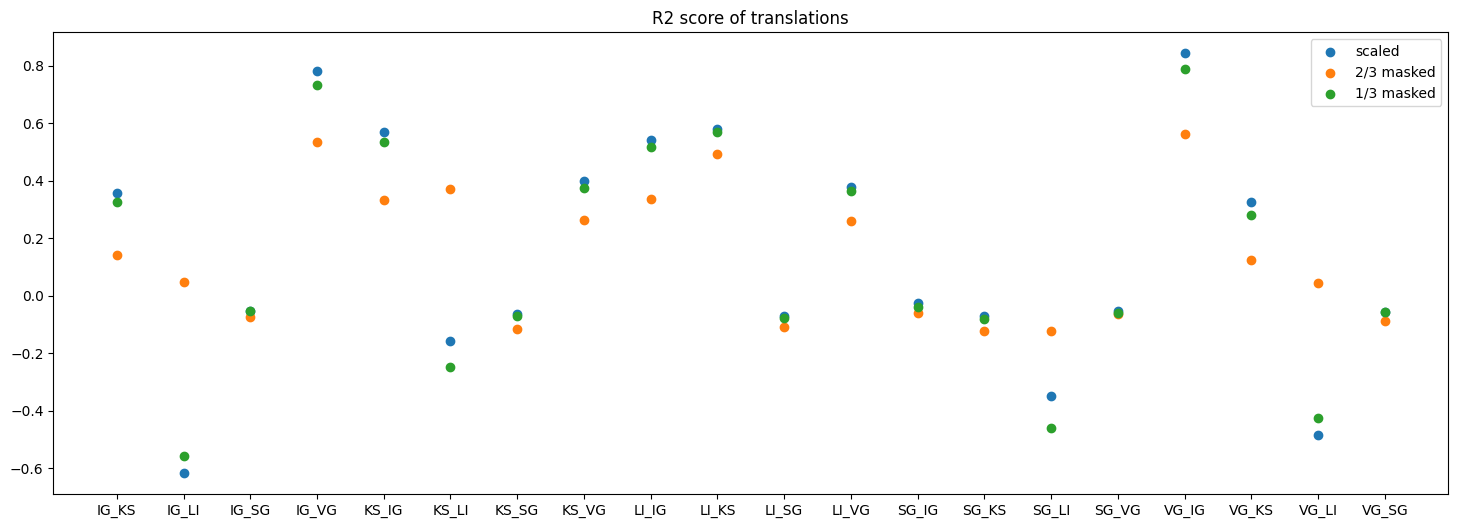

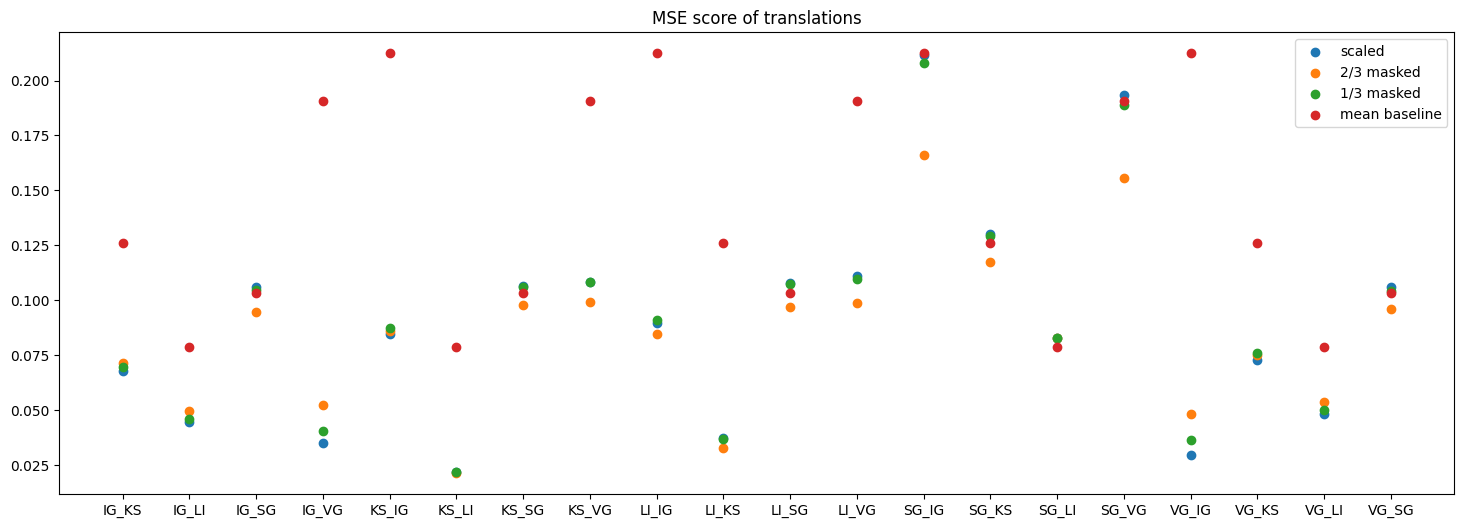

In [17]:
visualize_multiple_scores(r2_scaled, r2_masked3, r2_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'R2 score of translations')
visualize_multiple_scores(mse_scaled, mse_masked3, mse_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'MSE score of translations', mse_baseline)

In [ ]:
from evaluation.numerical_evaluation import count_features_per_method, count_feature_amount, count_lime_features


In [ ]:
print(dc_bw.explanation_set['breastw_273117_11880_EPOCH-BATCH_li.pkl'][3])

In [ ]:
dc_bw.mask_features(4, 0, True)
print(count_lime_features(dc_sb.scaled_explanations[1842:2763]))

# print(count_features_per_method(dc_bw.scaled_explanations, True))
# print(count_features_per_method(dc_bw.masked_explanations, True))
# print(count_feature_amount(dc_bw.scaled_explanations[2000:3000], True))

print(count_lime_features(dc_bw.non_zero_explanations[1212:1818]))

In [ ]:
dc_spf = DataCollector('spf')
print(len(dc_spf.scaled_explanations))
print(count_lime_features(dc_spf.scaled_explanations[778:1167]))

In [ ]:
dc_btsc = DataCollector('btsc')
print(len(dc_btsc.scaled_explanations))
print(count_lime_features(dc_btsc.scaled_explanations[300:450]))

In [ ]:
import torch 


In [ ]:
dc_btsc = DataCollector('btsc')
# print(btsc['btsc_300804_11880_EPOCH-BATCH_li.pkl'])

In [ ]:
from data.preprocessing import scale_data
from data.evaluation_prep import prepare_umap_data
from evaluation.umap import visualize_umap, project_umap
import torch

In [ ]:
spambase = dc.collect_data('spambase')
keys = dc.get_keys(spambase, 1)
umap_sb = prepare_umap_data(spambase, keys, scale=True)
embedding = project_umap(umap_sb, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_sb, embedding)

In [ ]:
umap_sb = prepare_umap_data(spambase, keys, scale=False)
embedding = project_umap(umap_sb, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_sb, embedding)

In [ ]:
breastw = dc.collect_data('breastw')
keys = dc.get_keys(breastw, 1)
umap_bw = prepare_umap_data(breastw, keys, scale=True)
embedding = project_umap(umap_bw, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_bw, embedding)

In [ ]:
umap_bw = prepare_umap_data(breastw, keys, scale=False)
embedding = project_umap(umap_bw, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_bw, embedding)

In [ ]:
spf = dc.collect_data('spf')
keys = dc.get_keys(spf, 1)
umap_spf = prepare_umap_data(spf, keys, scale=True)
embedding = project_umap(umap_spf, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_spf, embedding)

In [ ]:
umap_spf = prepare_umap_data(spf, keys, scale=False)
embedding = project_umap(umap_spf, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_spf, embedding)

In [ ]:
btsc = dc.collect_data('btsc')
keys = dc.get_keys(btsc, 1)
umap_btsc = prepare_umap_data(btsc, keys, scale=True)
embedding = project_umap(umap_btsc, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_btsc, embedding)
print(btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:19])

In [ ]:
umap_btsc = prepare_umap_data(btsc, keys, scale=False)
embedding = project_umap(umap_btsc, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_btsc, embedding)

In [ ]:
# btsc10 = btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:10]
# print(btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:10])
# btsc10_scaled = btsc10.clone()
# btsc10_scaled[:,-1] = torch.tensor([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
# print(btsc10_scaled)
# # print(btsc10)
# btsc10_scaled[:, :-1] = scale_data(btsc10_scaled[:, :-1])
# print(btsc10_scaled)


In [ ]:
from data.preprocessing import mask_features


In [ ]:
btsc_test = btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:10]
btsc_test_scaled = scale_data(btsc_test)
# print(btsc_test_scaled)
# print(mask_features(btsc_test_scaled, 0, 2))
